In [1]:
%pylab inline
from __future__ import print_function, division
from statsmodels.kernel_methods import kernels
from statsmodels.kernel_methods.kde_utils import numpy_trans1d_method
from scipy import fftpack

Populating the interactive namespace from numpy and matplotlib


In [2]:
#k = kernels.normal1d()
k = kernels.Epanechnikov()
xs = r_[-6:6:2048j]

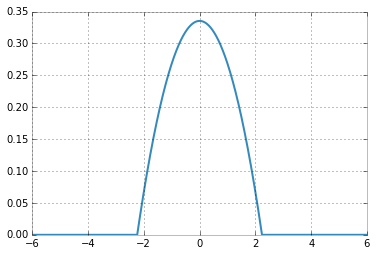

In [3]:
plot(xs, k(xs))

In [4]:
class Ker(kernels.Kernel1D):
    def __init__(self):
        global k
        self.lower = k.lower
        self.upper = k.upper
        self.cut = k.cut
        self.k = k
    def pdf(self, x, out=None):
        return self.k.pdf(x, out)
k1 = Ker()
print(k1.k)

Testing numerical approx.
-------------------------

CDF:  2.95378575206e-18


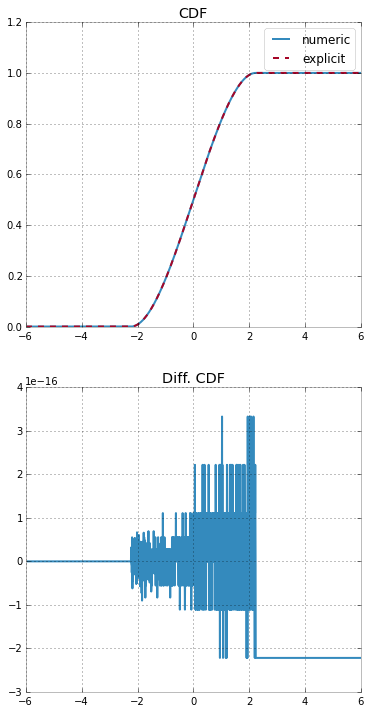

In [5]:
kC = k.cdf(xs)
k1C = k1.cdf(xs)
print("CDF: ", norm(kC - k1C)/len(xs))

f = figure()
f.set_figheight(12)
ax1 = f.add_subplot(2,1,1)
ax1.plot(xs, k1C, label='numeric')
ax1.plot(xs, kC, linestyle='--', label='explicit')
ax1.legend(loc='best')
ax1.set_title('CDF')
ax2 = f.add_subplot(2,1,2)
ax2.plot(xs, kC - k1C)
ax2.set_title('Diff. CDF')

In [6]:
print("PM1: ", norm(k.pm1(xs) - k1.pm1(xs))/len(xs))

PM1:  5.95205692933e-19


In [7]:
print("PM2: ", norm(k.pm2(xs) - k1.pm2(xs))/len(xs))

PM2:  3.0324077504e-18


In [8]:
fft.rfftfreq(1024, 0.1).max()

5.0

In [9]:
print("even numbers:")
fs__ = fft.rfftfreq(len(xs), xs[1]-xs[0])
fs_ = kernels.rfftfreq(len(xs), xs[1]-xs[0])
fmax = fs_.max()
print('fmax = ', 1/(2*(xs[1]-xs[0])))
print(fs__[1014:])
print(fs_[1014:])

print("odd numbers:")
fs__ = fft.rfftfreq(len(xs)+1, xs[1]-xs[0])
fs_ = kernels.rfftfreq(len(xs)+1, xs[1]-xs[0])
print('fmax = ', 1/(2*(xs[1]-xs[0])))
print(fs__[1014:])
print(fs_[1014:])

even numbers:
fmax =  85.2916666667
[ 84.45874023  84.54203288  84.62532552  84.70861816  84.79191081
  84.87520345  84.95849609  85.04178874  85.12508138  85.20837402
  85.29166667]
[ 84.45874023  84.54203288  84.62532552  84.70861816  84.79191081
  84.87520345  84.95849609  85.04178874  85.12508138  85.20837402
  85.29166667]
odd numbers:
fmax =  85.2916666667
[ 84.41752074  84.50077273  84.58402473  84.66727672  84.75052871
  84.83378071  84.9170327   85.00028469  85.08353668  85.16678868
  85.25004067]
[ 84.41752074  84.50077273  84.58402473  84.66727672  84.75052871
  84.83378071  84.9170327   85.00028469  85.08353668  85.16678868
  85.25004067]


In [10]:
N = 2**14
bw = 0.2
R = 10
dx = R/(bw*N)
fs = kernels.rfftfreq(N, dx)
print(fs.max(), dx)

163.84 0.0030517578125


FFT:  1.96431311206e-09


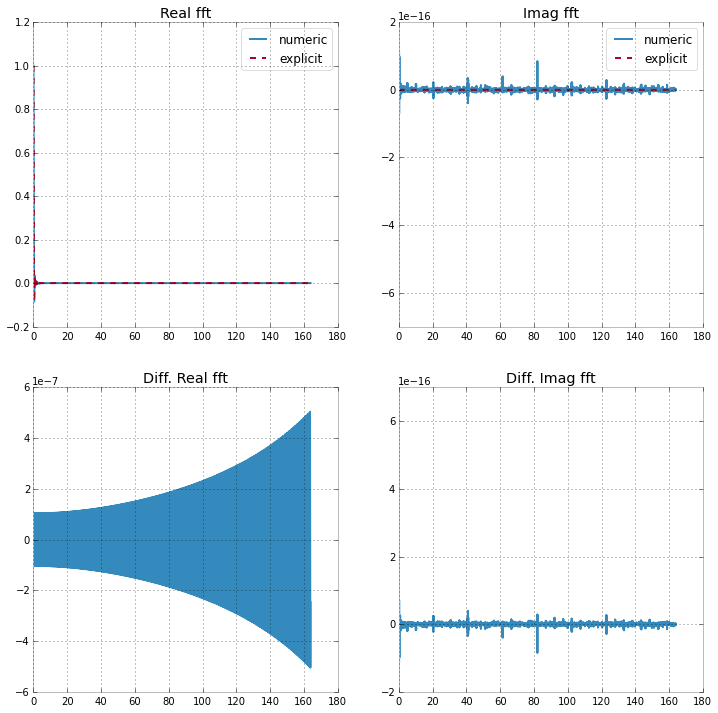

In [11]:
kf = k.rfft(N, dx)
k1f = k1.rfft(N, dx)
print("FFT: ", norm(kf - k1f)/len(fs))
f = figure()
f.set_size_inches(12, 12)
ax1 = f.add_subplot(2,2,1)
ax1.plot(fs, k1f.real, label='numeric')
ax1.plot(fs, kf.real, linestyle='--', label='explicit')
ax1.legend(loc='best')
ax1.set_title('Real fft')
ax2 = f.add_subplot(2,2,2)
ax2.plot(fs, k1f.imag, label='numeric')
ax2.plot(fs, kf.imag, linestyle='--', label='explicit')
ax2.legend(loc='best')
ax2.set_title('Imag fft')

ax3 = f.add_subplot(2,2,3)
ax3.plot(fs, kf.real - k1f.real)
ax3.set_title('Diff. Real fft')
ax4 = f.add_subplot(2,2,4)
ax4.plot(fs, kf.imag - k1f.imag)
ax4.set_title('Diff. Imag fft')

FFT_xfx:  4.38840066294e-09


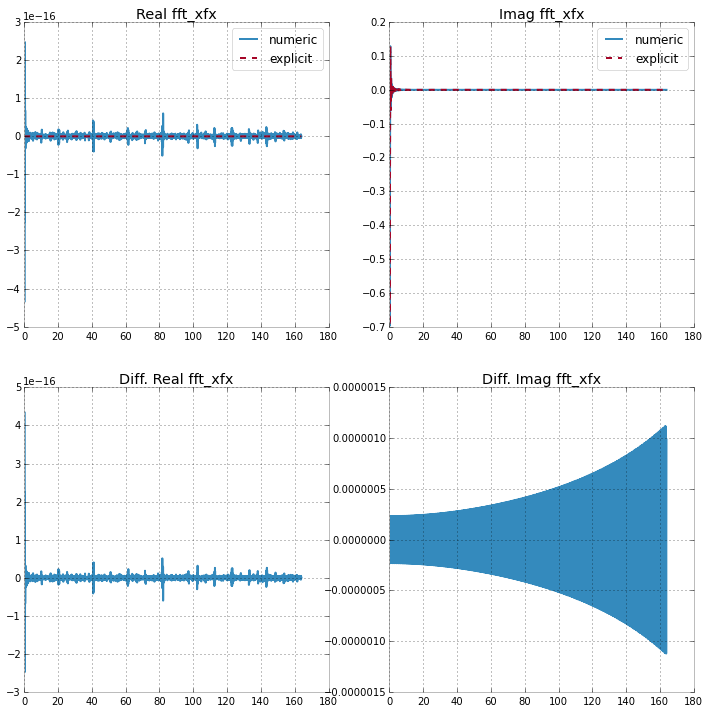

In [12]:
kfx = k.rfft_xfx(N, dx)
k1fx = k1.rfft_xfx(N, dx)
print("FFT_xfx: ", norm(kfx-k1fx)/len(fs))
f = figure()
f.set_size_inches(12, 12)

ax1 = f.add_subplot(2,2,1)
ax1.plot(fs, k1fx.real, label='numeric')
ax1.plot(fs, kfx.real, linestyle='--', label='explicit')
ax1.legend(loc='best')
ax2 = f.add_subplot(2,2,2)
ax2.plot(fs, k1fx.imag, label='numeric')
ax2.plot(fs, kfx.imag, linestyle='--', label='explicit')
ax2.legend(loc='best')
ax1.set_title('Real fft_xfx')
ax2.set_title('Imag fft_xfx')

ax3 = f.add_subplot(2,2,3)
ax3.plot(fs, kfx.real - k1fx.real)
#ax3.legend(loc='best')
ax3.set_title('Diff. Real fft_xfx')
ax4 = f.add_subplot(2,2,4)
ax4.plot(fs, kfx.imag - k1fx.imag)
#ax4.legend(loc='best')
ax4.set_title('Diff. Imag fft_xfx')

DCT:  2.55856115696e-09


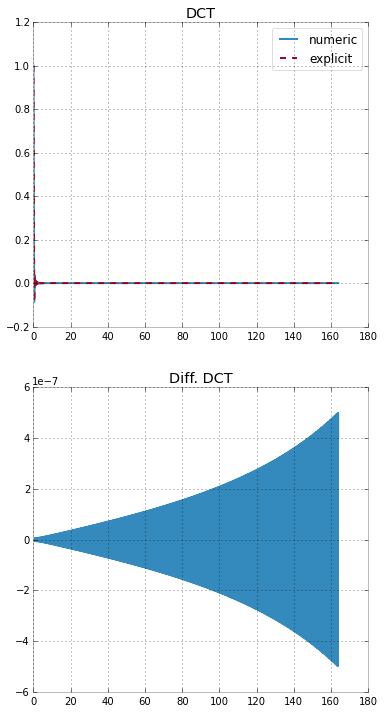

In [13]:
ds = kernels.dctfreq(N, dx)
kd = k.dct(N, dx)
k1d = k1.dct(N, dx)
print("DCT: ", norm(kd-k1d)/len(fs))
f = figure()
f.set_figheight(12)
ax1 = f.add_subplot(2,1,1)
ax1.plot(ds, k1d, label='numeric')
ax1.plot(ds, kd, linestyle='--', label='explicit')
ax1.legend(loc='best')
ax1.set_title('DCT')
ax2 = f.add_subplot(2,1,2)
ax2.plot(ds, kd - k1d)
ax2.set_title('Diff. DCT')